In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import numpy as np

In [2]:
weblogs = pd.read_csv('weblogs.csv') 

In [3]:
weblogs.head()

,ID,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,obSnwGoBCue8G08E_WCX,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.000000,...,4.0,0.494041,0.101266,1555089.0,2.718334e+07,0.000000,0.205128,1,0,1
1,nLSnwGoBCue8G08E_WCX,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.000000,...,6.0,0.341303,0.425714,2071344.0,1.427714e+01,0.547278,0.461318,4,0,1
2,ErSowGoBCue8G08ECmHa,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.000000,49505.0,1.413333e+01,0.642857,1.000000,2,0,0
3,E7SowGoBCue8G08ECmHa,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.821429,45984.0,1.332143e+01,0.037037,0.148148,5,0,0
4,FbSowGoBCue8G08ECmHa,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.000321,...,4.0,0.152943,0.953757,83171793.0,1.307407e+01,0.000000,0.023552,1,0,1


In [4]:
weblogs.describe()

,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,GET_METHOD,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
count,67352.000000,6.735200e+04,67352.000000,52945.000000,67352.000000,67352.000000,67352.000000,67352.000000,67352.000000,67352.000000,...,67352.000000,67352.000000,67352.000000,6.735200e+04,6.735200e+04,52945.000000,52945.000000,67352.000000,67352.000000,67352.000000
mean,60.242354,7.282704e+02,33.599747,40.319142,0.041596,0.979726,0.008104,0.011015,0.001155,0.993014,...,4.843405,0.681596,0.358740,3.221064e+05,1.407726e+06,0.260875,0.385265,14.644198,1.577785,0.200350
std,170.405463,8.037288e+03,150.974254,89.886341,0.079276,0.111944,0.058313,0.092476,0.026231,0.054588,...,1.491212,0.598631,0.280223,1.937276e+06,4.307353e+07,0.243584,0.248843,19.568441,5.816903,0.400266
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000e+00,0.071429,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,3.000000,0.000000,0.000000,9.866000e+03,7.166667e+00,0.093750,0.243902,0.000000,0.000000,0.000000
50%,22.000000,3.700000e+01,1.473684,6.418347,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,6.000000,0.772328,0.380694,9.409250e+04,1.075352e+01,0.200000,0.339450,2.000000,0.000000,0.000000
75%,63.000000,3.600000e+02,6.686705,31.717476,0.052441,1.000000,0.000000,0.000000,0.000000,1.000000,...,6.000000,1.224745,0.578947,2.688252e+05,1.300000e+01,0.342105,0.500000,28.000000,1.000000,0.000000
max,15265.000000,1.168297e+06,1800.000000,893.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,4.242641,1.000000,1.690364e+08,2.147484e+09,1.000000,1.000000,243.000000,723.000000,1.000000


In [5]:
weblogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67352 entries, 0 to 67351
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  67352 non-null  object 
 1   NUMBER_OF_REQUESTS  67352 non-null  int64  
 2   TOTAL_DURATION      67352 non-null  int64  
 3   AVERAGE_TIME        67352 non-null  float64
 4   STANDARD_DEVIATION  52945 non-null  float64
 5   REPEATED_REQUESTS   67352 non-null  float64
 6   HTTP_RESPONSE_2XX   67352 non-null  float64
 7   HTTP_RESPONSE_3XX   67352 non-null  float64
 8   HTTP_RESPONSE_4XX   67352 non-null  float64
 9   HTTP_RESPONSE_5XX   67352 non-null  float64
 10  GET_METHOD          67352 non-null  float64
 11  POST_METHOD         67352 non-null  float64
 12  HEAD_METHOD         67352 non-null  float64
 13  OTHER_METHOD        67352 non-null  float64
 14  NIGHT               67352 non-null  float64
 15  UNASSIGNED          67352 non-null  float64
 16  IMAG

In [6]:
weblogs.duplicated().sum()

0

In [7]:
weblogs = weblogs.drop('ID', axis=1)

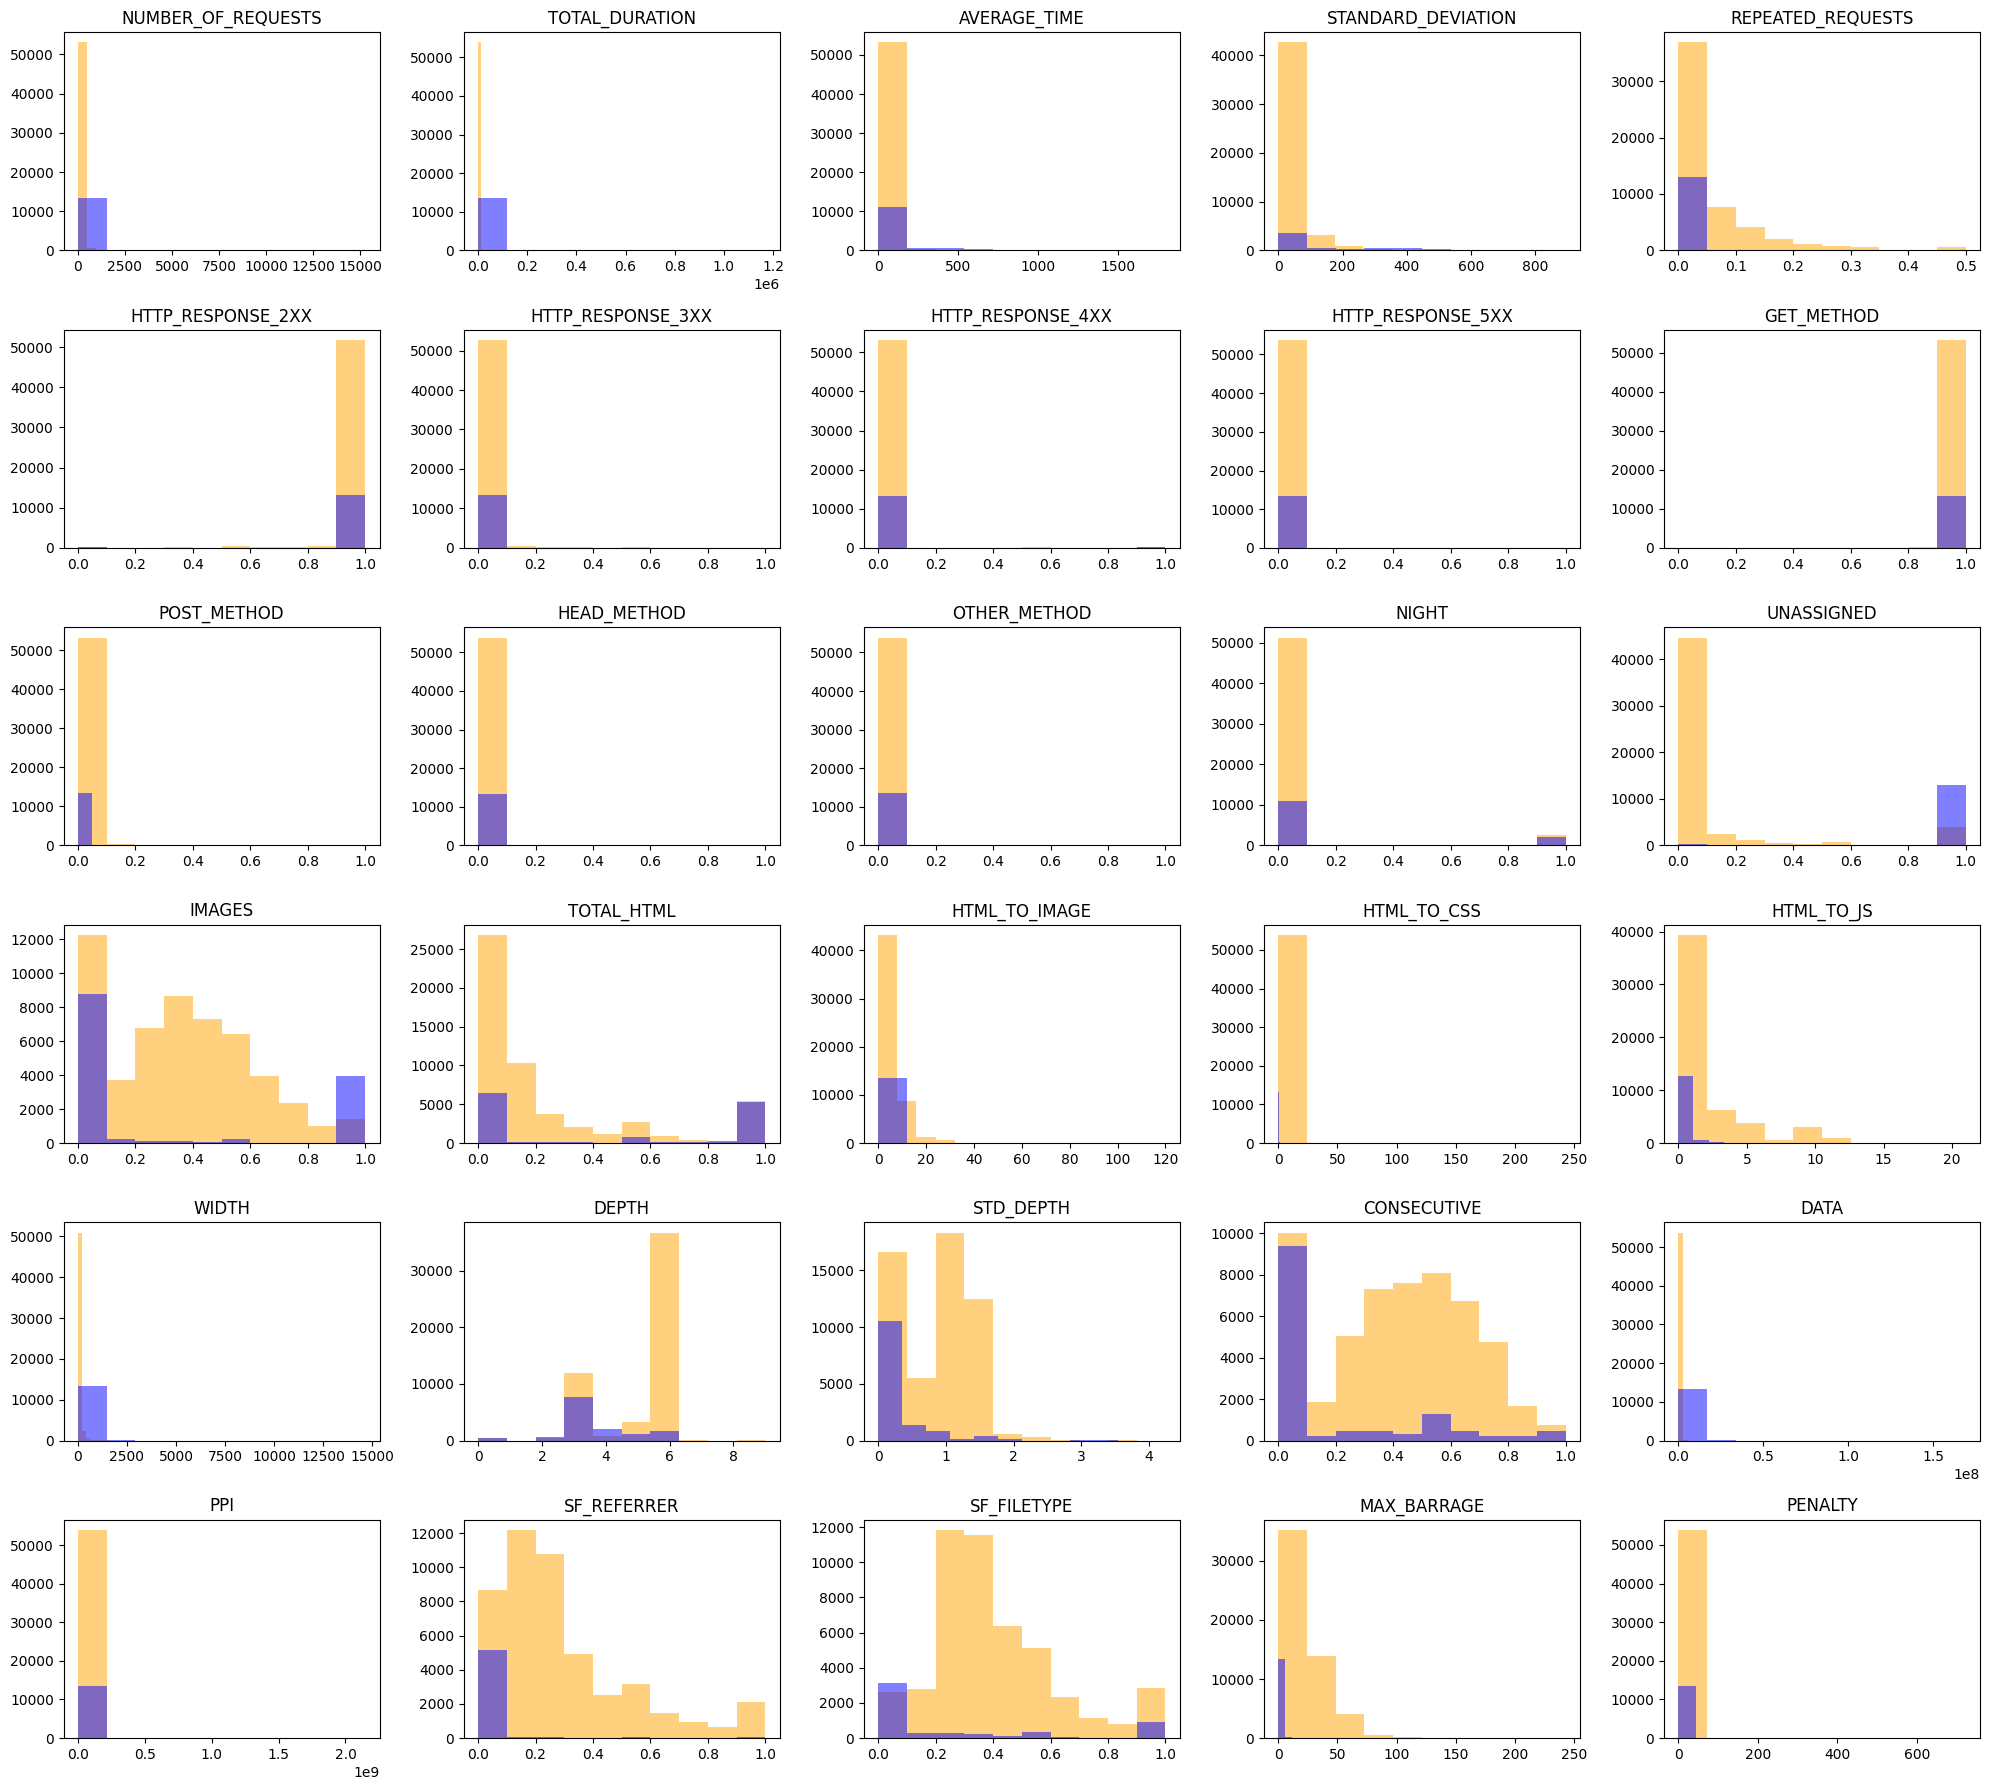

In [8]:
df_robot_0 = weblogs[weblogs['ROBOT'] == 0]
df_robot_1 = weblogs[weblogs['ROBOT'] == 1]

num_rows = 6
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 18))
axs = axs.ravel()
for i, col in enumerate(weblogs.columns):
    if col == 'ROBOT':
        continue
    axs[i].hist(df_robot_0[col], alpha=0.5, label='ROBOT 0', color='orange')
    axs[i].hist(df_robot_1[col], alpha=0.5, label='ROBOT 1', color='blue')
    axs[i].set_title(col)


plt.tight_layout()
plt.show()

In [9]:
weblogs = weblogs.drop_duplicates()
#weblogs = weblogs.drop('HTTP_RESPONSE_2XX', axis=1)
#weblogs = weblogs.drop('HTTP_RESPONSE_3XX', axis=1)
#weblogs = weblogs.drop('HTTP_RESPONSE_4XX', axis=1)
weblogs = weblogs.drop('HTTP_RESPONSE_5XX', axis=1)
weblogs = weblogs.drop('GET_METHOD', axis=1)
weblogs = weblogs.drop('HEAD_METHOD', axis=1)
weblogs = weblogs.drop('OTHER_METHOD', axis=1)
weblogs = weblogs.drop('PPI', axis=1)

In [10]:
weblogs[weblogs.isnull().any(axis=1)].head()

,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,POST_METHOD,NIGHT,...,WIDTH,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
14,1,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,8235.0,NaN,NaN,0,0,0
26,1,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,1355.0,NaN,NaN,0,0,1
28,1,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,3.0,0.0,0.0,8957.0,NaN,NaN,0,0,1
36,1,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,4143.0,NaN,NaN,0,0,0
39,1,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,736.0,NaN,NaN,0,0,1


In [11]:
median = weblogs["STANDARD_DEVIATION"].median()
weblogs["STANDARD_DEVIATION"].fillna(median, inplace=True)

In [12]:
median = weblogs["SF_FILETYPE"].median()
weblogs["SF_FILETYPE"].fillna(median, inplace=True)

In [13]:
median = weblogs["SF_REFERRER"].median()
weblogs["SF_REFERRER"].fillna(median, inplace=True)

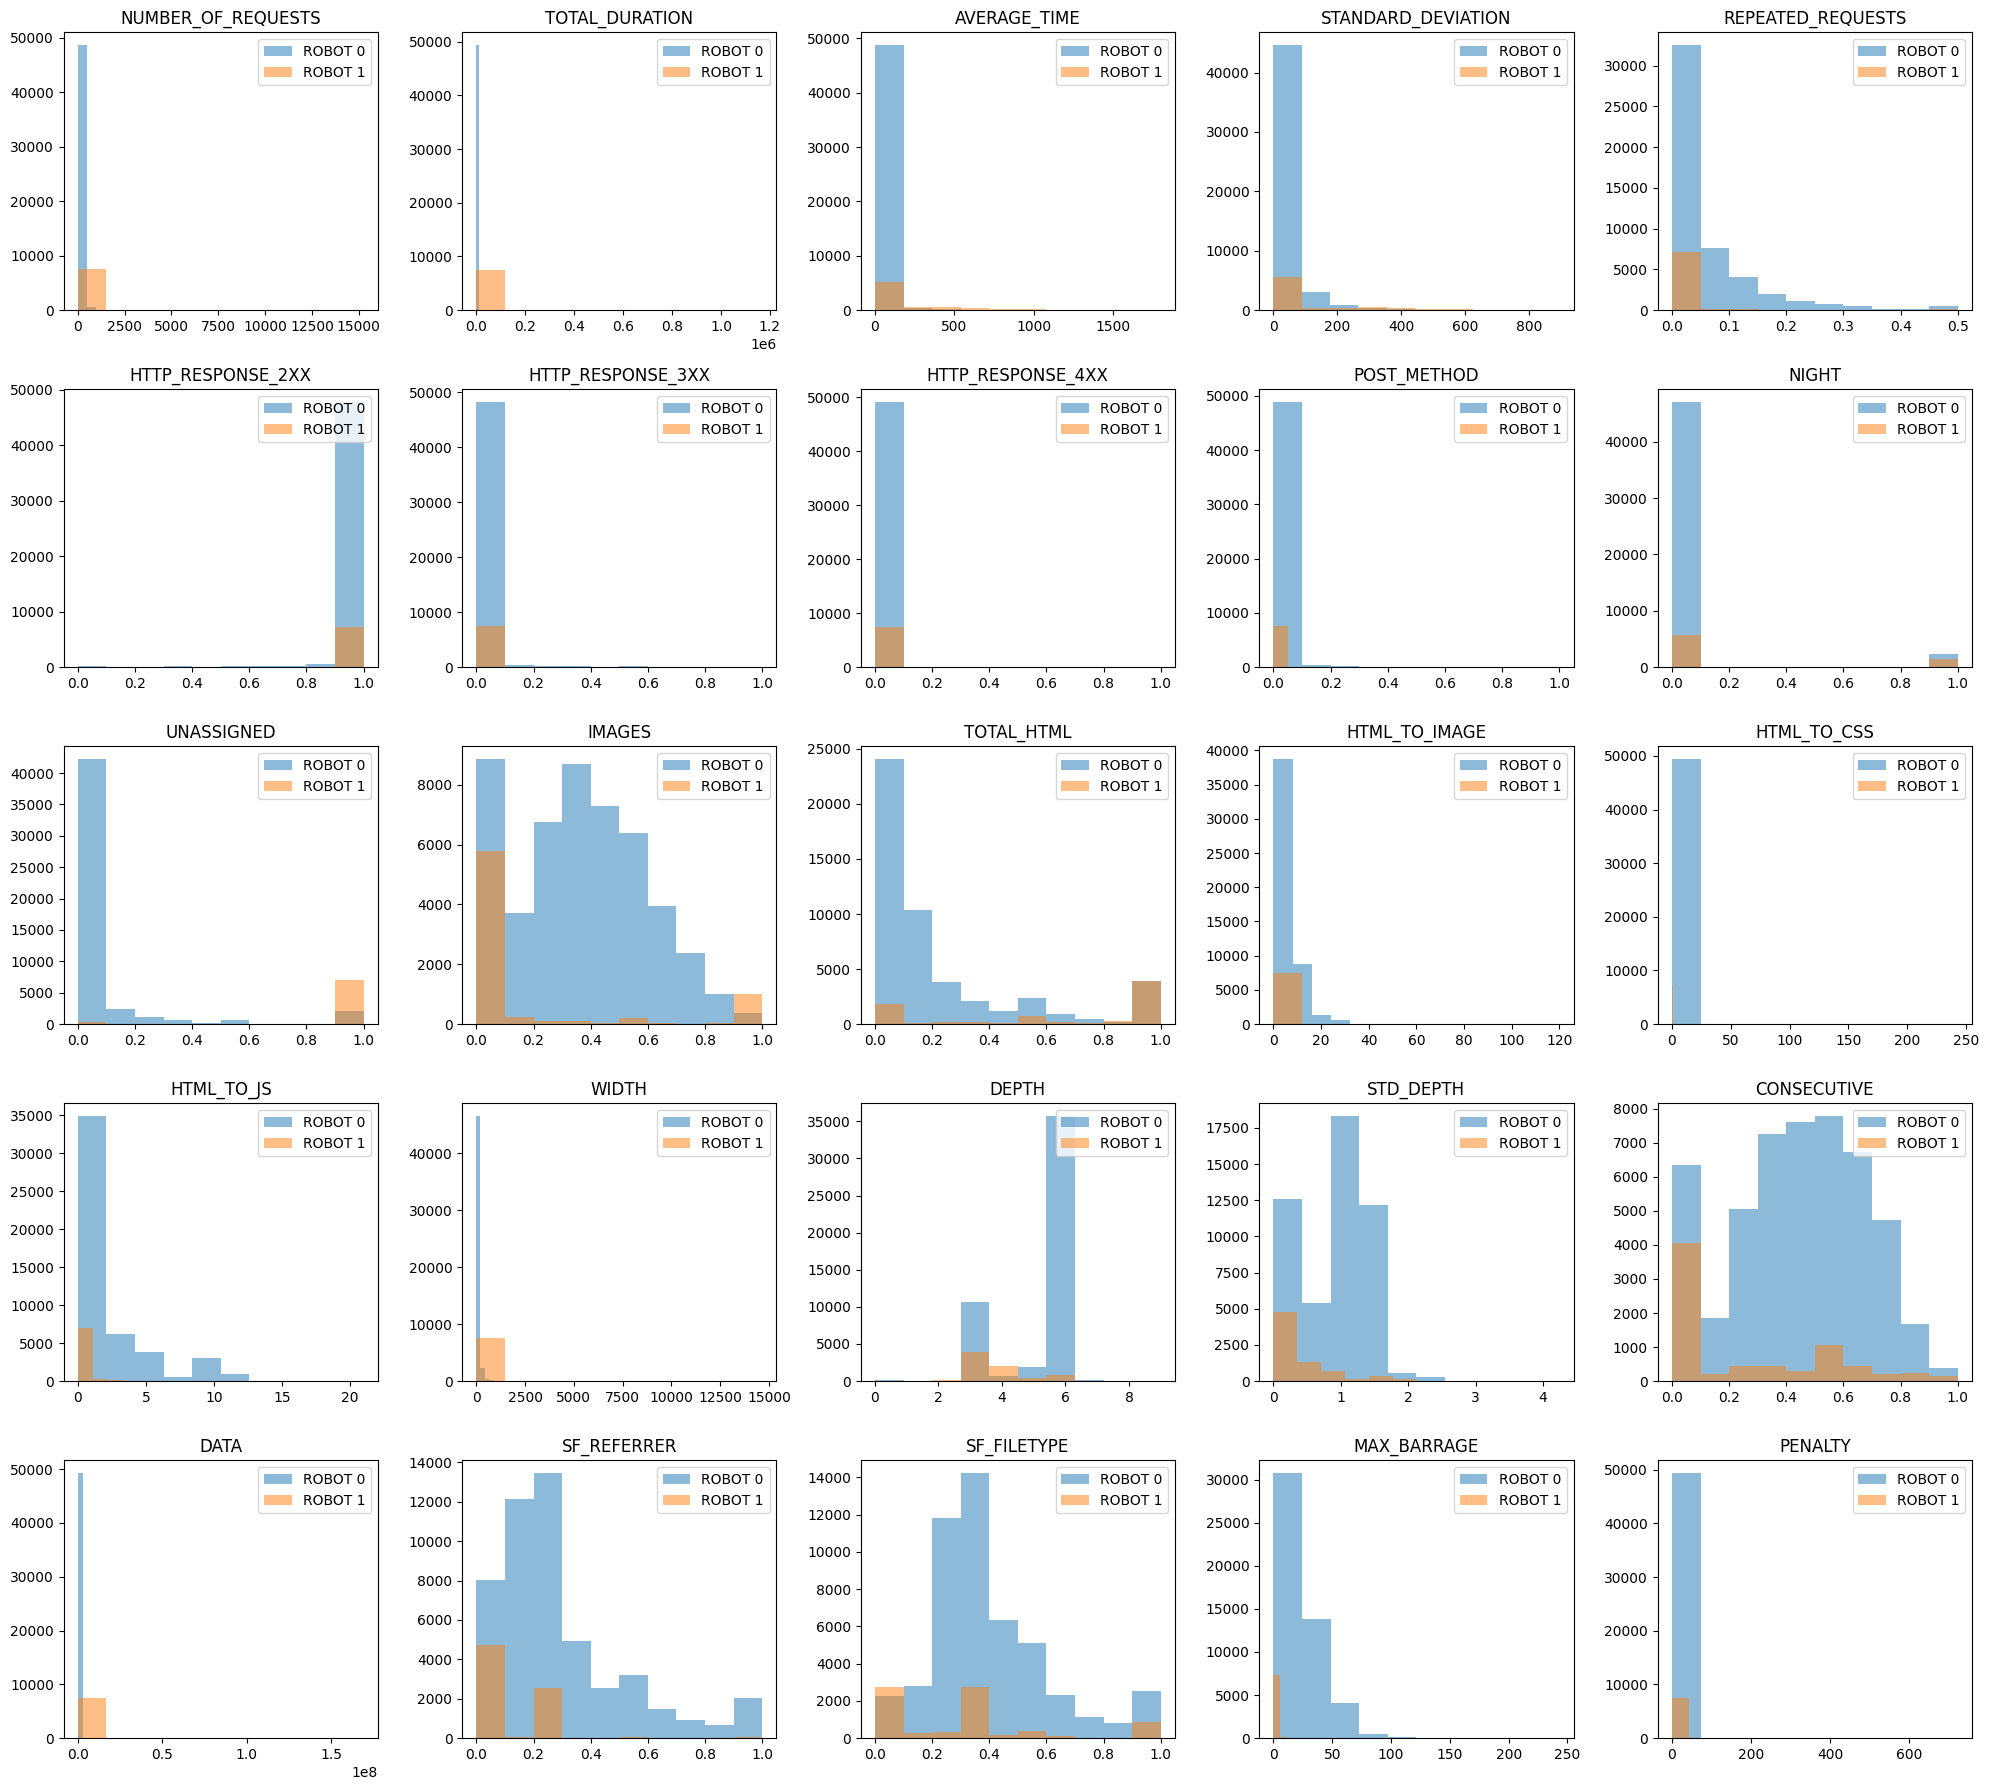

In [14]:
df_robot_0 = weblogs[weblogs['ROBOT'] == 0]
df_robot_1 = weblogs[weblogs['ROBOT'] == 1]

num_rows = 5
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 18))
axs = axs.ravel()
for i, col in enumerate(weblogs.columns):
    if col == 'ROBOT':
        continue
    axs[i].hist(df_robot_0[col], alpha=0.5, label='ROBOT 0')
    axs[i].hist(df_robot_1[col], alpha=0.5, label='ROBOT 1')
    axs[i].set_title(col)
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [15]:
weblogs.head()

,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,POST_METHOD,NIGHT,...,WIDTH,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.0,0.000000,...,44.0,4.0,0.494041,0.101266,1555089.0,0.000000,0.205128,1,0,1
1,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.0,0.365714,...,339.0,6.0,0.341303,0.425714,2071344.0,0.547278,0.461318,4,0,1
2,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,15.0,3.0,0.000000,0.000000,49505.0,0.642857,1.000000,2,0,0
3,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,28.0,3.0,0.000000,0.821429,45984.0,0.037037,0.148148,5,0,0
4,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.0,0.249946,...,9039.0,4.0,0.152943,0.953757,83171793.0,0.000000,0.023552,1,0,1


In [16]:
X = weblogs.iloc[:, :-1].values  
y = weblogs.iloc[:, -1].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [18]:
models = []    
models.append(('Logistic Regression', LogisticRegression(max_iter=1000)))    
models.append(('K Nearest Neighbors', KNeighborsClassifier()))    
models.append(('Support Vector Machine', SVC()))    
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('HistGradientBoostingClassifier', HistGradientBoostingClassifier()))

Accuracy score of Logistic Regression is: 0.8926513980609807


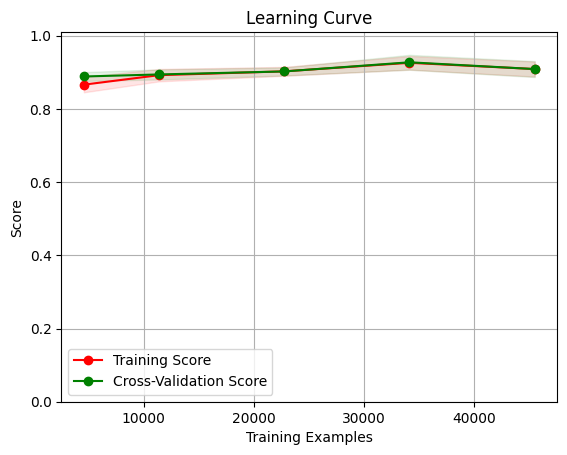

Accuracy score of K Nearest Neighbors is: 0.9055781930588731


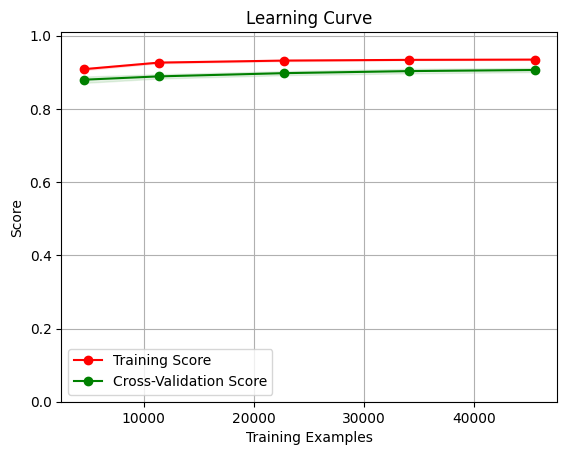

Accuracy score of Support Vector Machine is: 0.8755093438246452


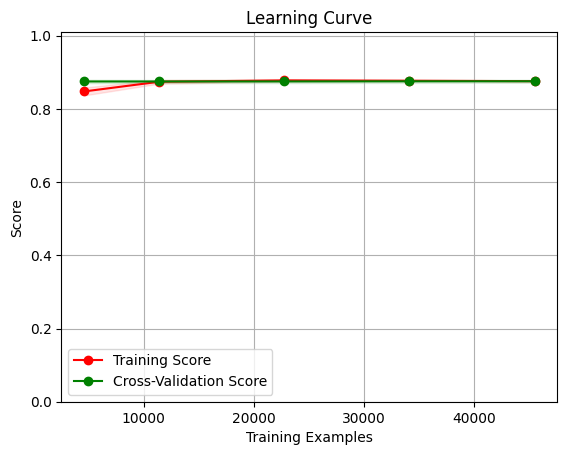

Accuracy score of Decision Tree is: 0.9705634396515386


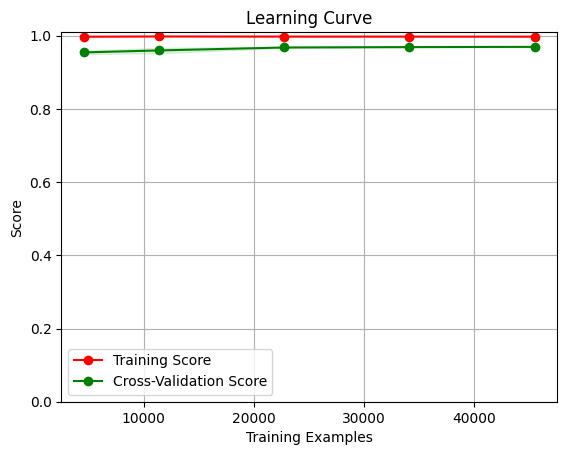

Accuracy score of Random Forest is: 0.9773078544330477


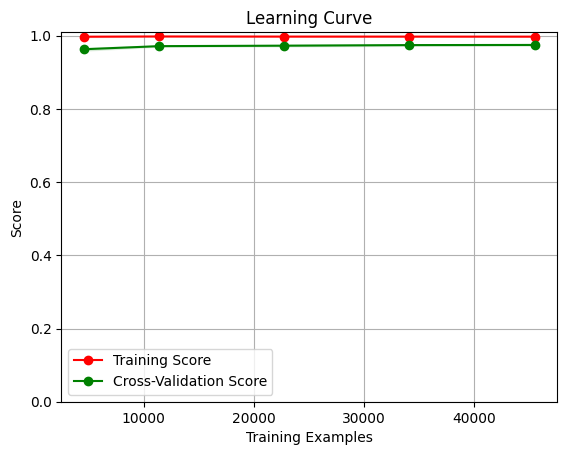

Accuracy score of HistGradientBoostingClassifier is: 0.9787831951665027


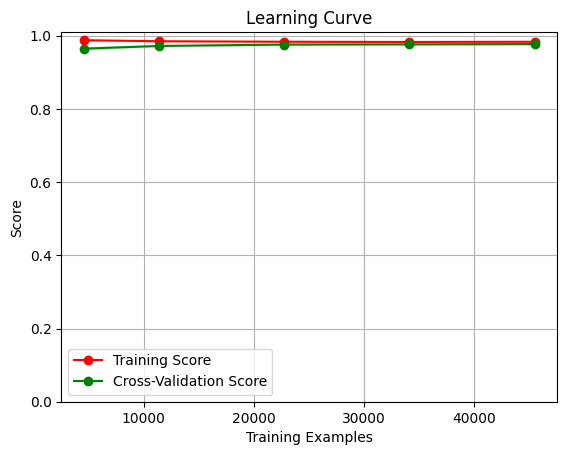

In [19]:
from sklearn.model_selection import learning_curve

for name, model in models:     
    model.fit(X_train, y_train)     
    predictions = model.predict(X_test) 
    print("Accuracy score of {} is: {}".format(name, accuracy_score(y_test, predictions)))
    train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=5,
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1],
    scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.ylim((0.0, 1.01))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

    plt.legend(loc='best')
    plt.show()

In [20]:
param_grid = {
    'max_iter': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.1, 1, 10],
    'max_depth': [3, 5, 7, 9 ]
}

# Create the GridSearchCV object
grid = GridSearchCV(
    HistGradientBoostingClassifier(random_state=1),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 200}


In [21]:


model = HistGradientBoostingClassifier(max_iter=200, learning_rate=0.1, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(predictions)

[1 0 0 ... 0 0 0]


In [22]:

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

probability = model.predict_proba([X_test[1]]) * 100

print('Zekerheid Mens:',format(probability[0][0], ".2f"), '%')
print('Zekerheid Robot:',format(probability[0][1], ".2f"), '%')

Accuracy: 0.9847548124209639
Zekerheid Mens: 99.86 %
Zekerheid Robot: 0.14 %


In [23]:
matrix = confusion_matrix(y_test, predictions)

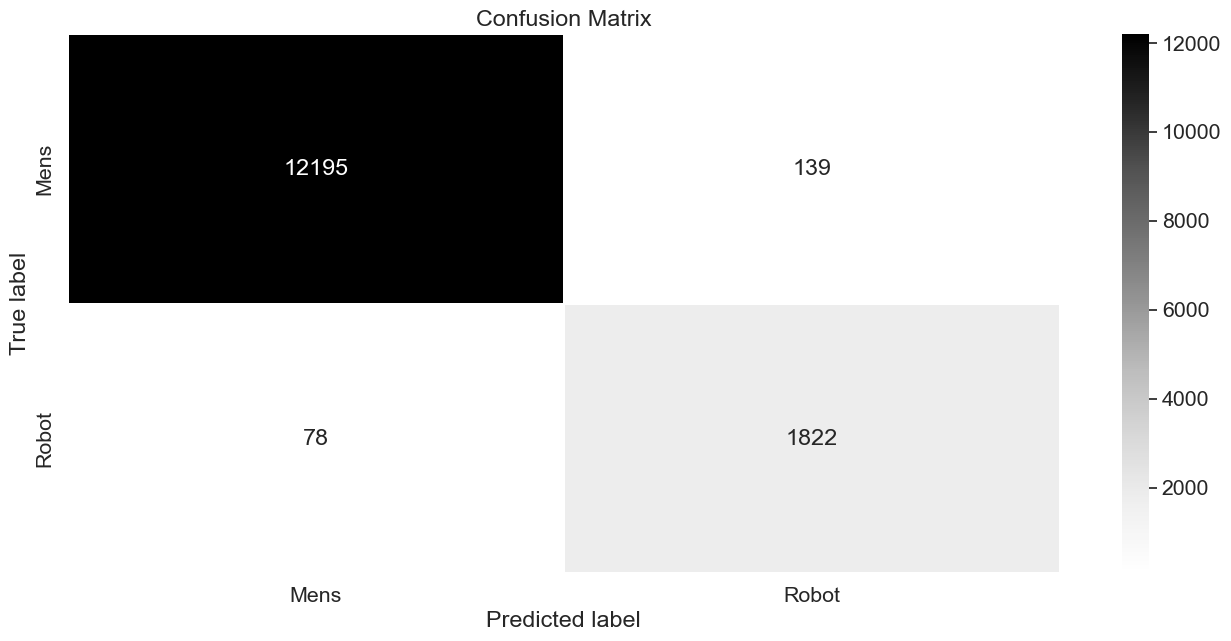

In [24]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
labels = ['Mens', 'Robot']
sns.heatmap(matrix, cmap=plt.cm.Greys, linewidths=0.2, annot=True,fmt='.0f', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()